<a href="https://colab.research.google.com/github/VirtusDomo/cs4301Collabs/blob/main/HW5_JOA170000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework 5 
### James Anyabine JOA170000

### Step 1: Description

This notebook performs regression to estimate the price of a car given various features. 

### Step 2: Load the data 

* upload the data
* put the data in a pandas dataframe
* output the data shape (rows, cols)
* output the first few rows of the data

In [1]:
# load the csv file up into the cloud

from google.colab import files
uploaded = files.upload()

Saving audi.csv to audi.csv


In [3]:
# load the data into a pandas data frame
# print the shape of the data frame
# display the first few rows
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['audi.csv']))

print(df.shape)
print(df.head(5))


(10668, 9)
  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0


### Step 3 Data Exploration



In [7]:
df.dtypes
#df.columns

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [12]:
# change categorical column type from object to category
for col in df.columns:
  if df[col].dtypes == 'object':
    df[col] = df[col].astype('category') 


df.dtypes

model           category
year               int64
price              int64
transmission    category
mileage            int64
fuelType        category
tax                int64
mpg              float64
engineSize       float64
dtype: object

In [14]:
# check for NAs
df.isnull().sum().sum()

0

In [15]:
# use describe() to examine the data
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


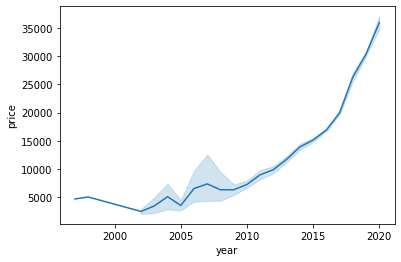

In [16]:
# using seaborn, craete a lineplot() with year on the x axis and price on the y axis
import seaborn as sns

sns.lineplot('year', 'price', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


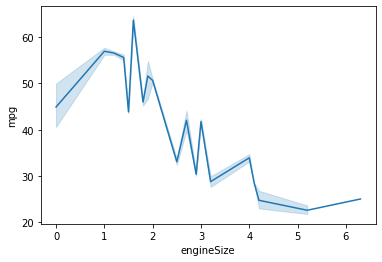

In [17]:
# create another plot exploring the data
# choose columns and plot type
sns.lineplot('engineSize' , 'mpg', data=df)

### Step 4 Prepare Data

You can use the code below for this step. 



In [18]:
# set up X and y

X=df.drop(columns=['price'],axis=1)
y=df['price']

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

# scale the numeric data
col_list = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = MinMaxScaler()
train_numeric = scaler.fit_transform(X_train[col_list])
test_numeric = scaler.transform(X_test[col_list])

# one-hot encode the categorical data for model, transmission, and fuelType
# model
zipBinarizer = LabelBinarizer().fit(df['model'])
train_model = zipBinarizer.transform(X_train['model'])
test_model = zipBinarizer.transform(X_test['model'])
# transmission
zipBinarizer = LabelBinarizer().fit(df['transmission'])
train_transmission = zipBinarizer.transform(X_train['transmission'])
test_transmission = zipBinarizer.transform(X_test['transmission'])
# fuelType
zipBinarizer = LabelBinarizer().fit(df['fuelType'])
train_fuelType = zipBinarizer.transform(X_train['fuelType'])
test_fuelType = zipBinarizer.transform(X_test['fuelType'])

# concatenate
X_train_input = np.hstack([train_numeric, train_model, train_transmission, train_fuelType])
X_test_input = np.hstack([test_numeric, test_model, test_transmission, test_fuelType])

print(X_train_input[:3])


[[0.82608696 0.12697563 0.21551724 0.20306966 0.22222222 0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  1.        ]
 [0.95652174 0.02186075 0.25       0.18122786 0.25396825 0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         1.         0.
  0.        ]
 [0.86956522 0.10696628 0.25862069 0.28571429 0.15873016 1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        

### Step 5 Linear regression

Run linear regression in sklearn. 

In [21]:
# train the algorithm
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_input, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [24]:
# make predictions
Y_pred = linreg.predict(X_test_input)

In [25]:
# evaluation on the test data using mse, mae, and r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MSE:', mean_squared_error(y_test, Y_pred))
print('MAE:', mean_absolute_error(y_test, Y_pred))
print('Correlation:', r2_score(y_test,Y_pred))

MSE: 5.962237773395945e+27
MAE: 1671504072148.0137
Correlation: -3.895955448250785e+19


In [26]:
# display the first 5 predictions
# display the first 5 actual values
dp = pd.DataFrame({'Actaual': y_test, 'Predicted': Y_pred})
dp.head(5)

,Actaual,Predicted
5551,18500,17760.0
2487,20700,20352.0
9931,10799,7456.0
74,16000,19472.0
228,21985,23808.0


### Regression in Keras

In [72]:
# build a sequential model
# you choose the architecture
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense 

model = keras.Sequential()
model.add(keras.Input(shape=(37, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dense(64, activation='selu'))
model.add(layers.Dense(32, activation='tanh'))

#X_train_input.shape
#y_test.shape
X_test_input.shape

(2134, 37)

In [74]:
# compile the model
model.compile(optimizer='adam',
              loss='MeanSquaredError',
              metrics=['mse','mae'])


In [86]:
# train the model
model.fit(X_train_input, y_train, epochs=40, batch_size=128)
*miss ,test_mse_score, test_mae_score  = model.evaluate(X_test_input, y_test)
#test_mae_score


Epoch 1/40
67/67 [==============================] - 1s 9ms/step - loss: 654537344.0000 - mse: 654537344.0000 - mae: 22831.7090
Epoch 2/40
67/67 [==============================] - 1s 8ms/step - loss: 654537472.0000 - mse: 654537472.0000 - mae: 22831.7051
Epoch 3/40
67/67 [==============================] - 1s 8ms/step - loss: 654537536.0000 - mse: 654537536.0000 - mae: 22831.7129
Epoch 4/40
67/67 [==============================] - 0s 7ms/step - loss: 654537536.0000 - mse: 654537536.0000 - mae: 22831.7188
Epoch 5/40
67/67 [==============================] - 1s 8ms/step - loss: 654537472.0000 - mse: 654537472.0000 - mae: 22831.7109
Epoch 6/40
67/67 [==============================] - 1s 7ms/step - loss: 654537536.0000 - mse: 654537536.0000 - mae: 22831.7109
Epoch 7/40
67/67 [==============================] - 1s 8ms/step - loss: 654537344.0000 - mse: 654537344.0000 - mae: 22831.7148
Epoch 8/40
67/67 [==============================] - 0s 7ms/step - loss: 654537472.0000 - mse: 654537472.0000 - 

In [87]:
# output test mse score, test mae score
print('MAE:', test_mae_score)
print('MSE:', test_mse_score)
#print(output)

23151.51171875
689029056.0


### Step 7 Commentary

Answer the following questions:

a. Compare metrics from sklearn and Keras. 


b. Explore the data a bit more to speculate on why you achieved the results you got. 


c. Describe all the architectures/hyperparameters you tried and the results. What do you conclude?



a. My metric between sklearn and Keras were wildly different. I am not sure why that is however.

b. I believe I achieved the results I did because I did a 4 layer model using each type of activation. Giving wildly different and smaller results than the sklearn version.

c.I tried two implementations. One being the standard Keras Sequential Model and the other being the Functional API, while the Functional API was more compact, I felt the Sequential Model to be more robust allowing for more customizability and thus giving possibilities to more favorable results. 